# Equation for Logistic Population Growth

# $\frac{dN}{dt}=rN\left(\frac{K-N}{K}\right)$

We can also look at logistic growth as a mathematical equation. Population growth rate is measured in number of individuals in a population (N) over time (t). The term for population growth rate is written as (dN/dt). The d just means change. K represents the carrying capacity per individual for a population. The logistic growth equation growth equation assumes that K and r do not chnage over time in a population. 

## Logistic Growth

In [26]:
import numpy as np
import math
from numpy import *
from sympy import *
from pylab import *
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sympy.interactive import printing
printing.init_printing(use_latex=True)

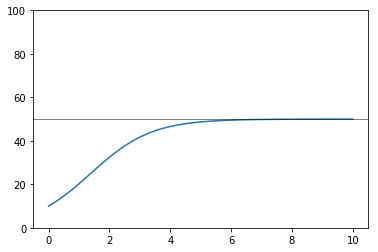

In [3]:
def f(N,t,r,K):
    return r * N * (1-N/K)

r = 1
K = 50
N0 = 10
t = np.linspace(0,10,100)

N = odeint(f,N0,t,args = (r,K))
plt.plot(t,N)
plt.ylim([0,100])
plt.axhline(y=K,color='k',linewidth=0.5)
plt.show()

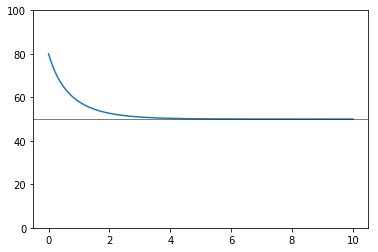

In [5]:
N0 = 80
t = np.linspace(0,10,100)

N = odeint(f, N0, t, args = (r,K))
plt.plot(t,N)
plt.ylim([0,100])
plt.axhline(y=K,color='k',linewidth=0.5)
plt.show()

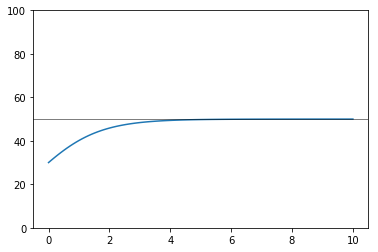

In [6]:
N0 = 30
t = np.linspace(0,10,100)

N = odeint(f, N0, t, args = (r,K))
plt.plot(t,N)
plt.ylim([0,100])
plt.axhline(y=K,color='k',linewidth=0.5)
plt.show()

# Example 02 
## Let's start with the logistic equation, now with any parameters for growth rate and carrying capacity: 
## $\frac{dx}{dt} = rx(1-\frac{x}{K})$ with $r=2$, $K=10$ and $x0 = 0.1$

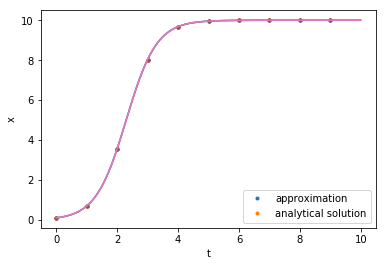

In [13]:
t = arange(0,10,1)
# parameters 
r = 2
K = 10
# initial condition
x0 = 0.1

# Let's define the right - hand side of the differential equation 
# It must be a function of the dependendent variable (x) and of the time (t), even if time does not appear explicit;y. 
# this is how you define a function:
def f(x,t,r,K):
    # in python, there are no curling braces '{}' to start or end a function, nor any special keyword: 
    # the block is defined by leading spaces (usually 4)
    # arithmetic is done the same as in other languages: +, -, *, /
    return r*x*(1-x/K)

# call the function that performs intergration
# the order of the arguments as below: the derivative function, the initial condition, the points where you want the solution
# and the list of the parameters
x = odeint(f,x0,t,(r,K))

#plot the solution
plt.plot(t,x,'.')
plt.xlabel('t')
plt.ylabel('x')
t = arange(0,10,0.01)
# plot analytical solution
# notice that 't' is an array when you do an arithmetic operation
# with an array, it is the same as doing it for each element. 
plt.plot(t,K*x0*exp(r*t)/(K+x0*(exp(r*t)-1)))
plt.legend(['approximation','analytical solution'],loc = 'best') # draw legend
plt.show()

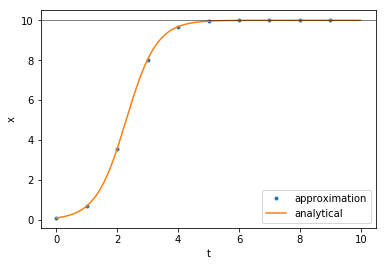

In [16]:
t = arange(0,10,1)
# parameters 
r = 2
K = 10
# initial condition
x0 = 0.1

# Let's define the right - hand side of the differential equation 
# It must be a function of the dependendent variable (x) and of the time (t), even if time does not appear explicit;y. 
# this is how you define a function:
def f(x,t,r,K):
    # in python, there are no curling braces '{}' to start or end a function, nor any special keyword: 
    # the block is defined by leading spaces (usually 4)
    # arithmetic is done the same as in other languages: +, -, *, /
    return r*x*(1-x/K)

# call the function that performs intergration
# the order of the arguments as below: the derivative function, the initial condition, the points where you want the solution
# and the list of the parameters
x = odeint(f,x0,t,(r,K))

#plot the solution
plt.plot(t,x,'.')
plt.xlabel('t')
plt.ylabel('x')
t = arange(0,10,0.01)
# plot analytical solution
# notice that 't' is an array when you do an arithmetic operation
# with an array, it is the same as doing it for each element. 
plt.plot(t,K*x0*exp(r*t)/(K+x0*(exp(r*t)-1)))
plt.axhline(y=K,color='k',linewidth=0.5)
plt.legend(['approximation','analytical'],loc = 'best') # draw legend
plt.show()

# BACTERIAL GROWTH

### Example 01: A culture has $P_{0}$ number of bacteria. At $t=1$ h the number of bacteria is measured to be $\frac{3}{2}P_{0}$. If the rate of growth is proportional to the number of bacteria $P{t}$ present at the time $t$, the determine the time necessary for the number of bacterial to triple. 

In [21]:
t,k = Symbol('t'),Symbol('k')
P = Function('P')(t)
diffeq = Eq(P.diff(t)-k*P,0)
sol = dsolve(diffeq)
P0 = Symbol('P0')
constants = solve([sol.subs([(P,P0),(t,t)]),sol.subs([(P,3/2*P0),(t,t+1)])])
sol = sol.subs(k,constants[1][k])
sol

In [22]:
c1 = solve([sol.subs([(P,P0),(t,0)]),sol.subs([(P,3/2*P0),(t,1)])])
c1

In [24]:
sol = sol.subs(c1)
sol

In [25]:
solve([sol.subs(P,3*P0)],t)

### Example 02: Plot the function $y=P_{0}e^{0.405465108164}$,$y_{0}=20$

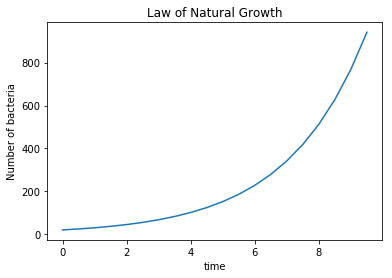

In [27]:
t = arange(0,10,0.5)
P0 = 20
y = 20*exp(0.405465108108164*t)
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('Number of bacteria')
plt.title('Law of Natural Growth')
plt.show()

# Mathematical model: Simple Pendulum

$\theta^{''}+(b/m)\theta^{'}+(g/L).Sin\theta = 0$

$\theta^{''}$ - Angular Acceleration 

$\theta^{'}$ - Angular Velocity 

$\theta$ - Angular Displacement <br>
$b$ - Damping factor <br>
$g$ - Acceleration due to gravity = 9.81 <br>
$L$ - Length of the pendulum <br>
$m$ - Mass of the bob<br>

## Converting this 2nd order differential equation to two 1st order differential equations - 

Let $\theta_{1}=0$<br>
and $\theta_{2}=\frac{d\theta}{dt} = \frac{d\theta_{1}}{dt}$ <br>
$\frac{d\theta_2}{dt}=\frac{d^{2}\theta}{dt} = \frac{d^{2}\theta_{1}}{dt}$ <br>
Thus, the 1st order differential equations are, <br>
$\frac{d\theta_2}{dt} = (-\frac{b}{m})\theta_{1}+(-frac{g}{L})sin\theta_{1}$ <br>
$\frac{d\theta_{1}}{dt} = \theta_{2}$

In [20]:
# importing libraries

import math
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import os

# Initial and end values
st = 0              # Start time(s)
et = 20.4           # End time (s)
ts = 0.1            # Time step(s)
g = 9.81            # Acceleration due to gravity (m/s^2)
L = 1               # Length of the pendulum (m) 
b = 0.5             # Damping factor(kg/s)
m = 1               # Mass of bob (kg) (14-03-2019 CMS)

# 1st order equations to solve in a fraction

"""
theta1 is angular displacement at current time instant
theta2 is angular velocity at current time instant
dtheta2_dt is angular acceleration at current time instant
dtheta1_dt is rate of change of angular displacement at current time instant 
"""
def sim_pen_eq(t,theta):
   dtheta2_dt=(-b/m)*theta[1]+(-g/L)*np.sin(theta[0])
   dtheta1_dt=theta[1]
   return [dtheta1_dt,dtheta2_dt]

theta1_ini=0
theta2_ini=3
theta_ini=[theta1_ini,theta2_ini]
t_span=[st,et+ts]
t=np.arange(st,et+ts,ts)
sim_points=len(t)
l=np.arange(0,sim_points,1)
theta12= solve_ivp(sim_pen_eq,t_span,theta_ini,t_eval=t)
theta1=theta12.y[0,:]
theta2=theta12.y[1,:]
plt.plot(t,theta1,label='Angular displacement(rad)')
plt.plot(t,theta2,label='Angular velocity(rad/s)')
plt.xlabel('Time(s)')
plt.ylabel('Angular Disp. (rad) and Angular velocity. (rad/s)')
plt.legend()
plt.show()

ImportError: cannot import name 'solve_ivp'